In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf

In [3]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,30480.261719,12703464114
2023-06-26,30480.523438,30636.029297,29955.744141,30271.130859,30271.130859,16493186997
2023-06-27,30274.320312,31006.787109,30236.650391,30688.164062,30688.164062,16428827944
2023-06-28,30696.560547,30703.279297,29921.822266,30086.246094,30086.246094,14571500779
2023-06-29,30081.425781,30243.628906,30072.476562,30208.392578,30208.392578,13518563328


In [6]:
df.shape

(3208, 6)

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,30480.261719,12703464114
2023-06-26,30480.523438,30636.029297,29955.744141,30271.130859,30271.130859,16493186997
2023-06-27,30274.320312,31006.787109,30236.650391,30688.164062,30688.164062,16428827944


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

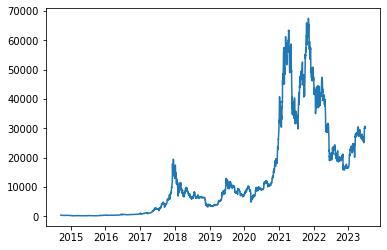

In [9]:
plt.plot(df.index.to_numpy(),df['Adj Close'].to_numpy())
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3208 entries, 2014-09-17 to 2023-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3208 non-null   float64
 1   High       3208 non-null   float64
 2   Low        3208 non-null   float64
 3   Close      3208 non-null   float64
 4   Adj Close  3208 non-null   float64
 5   Volume     3208 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 175.4 KB


In [11]:
to_row=int(0.9*len(df))
training=list(df[:to_row]['Adj Close'])
testing=list(df[to_row:]['Adj Close'])

In [12]:
type(training)

list

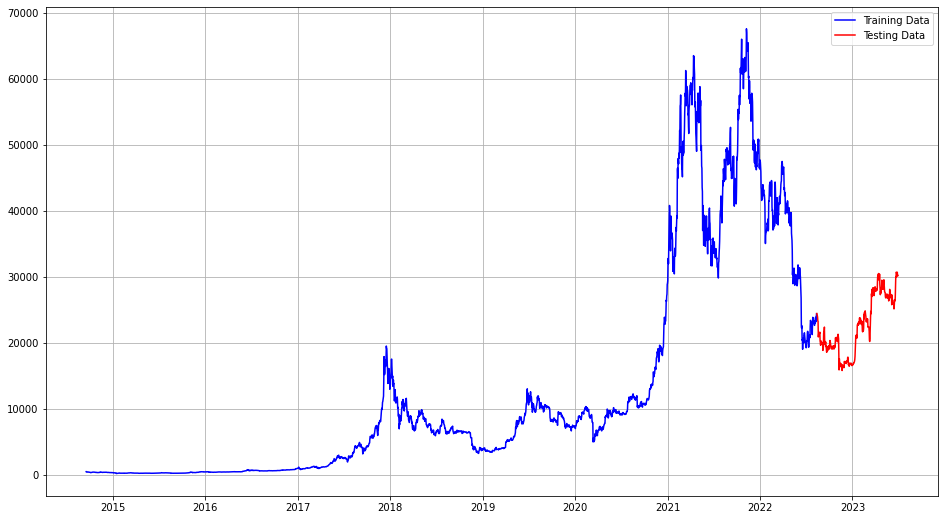

In [13]:
plt.figure(figsize=(16,9))
plt.grid('True')
plt.plot(df[:to_row]['Adj Close'],'blue',label='Training Data')
plt.plot(df[to_row:]['Adj Close'],'red',label='Testing Data')
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller 
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adf_test(df['Adj Close'])

ADF Statistics: -1.528526839060476
p- value: 0.5193553006090114
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
## Use Techniques Differencing
df['Close First Difference']=df['Adj Close']-df['Adj Close'].shift(1)

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Close First Difference
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-32.894012
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-29.644012
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,14.108002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-10.082977


In [18]:
df=df.drop(['Open','High','Low','Close','Volume'],axis=1)

In [19]:
df.head()

,Adj Close,Close First Difference
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977


In [20]:
df['Close First Difference'].fillna(0,inplace=True)

In [21]:
adf_test(df['Close First Difference'])

ADF Statistics: -9.450474242637982
p- value: 4.630988531070026e-16
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

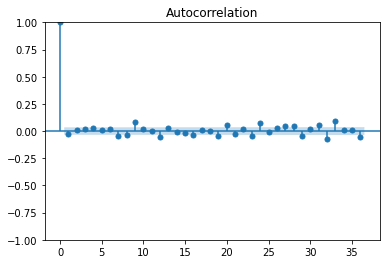

In [23]:
acf = plot_acf(df['Close First Difference'].dropna())

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

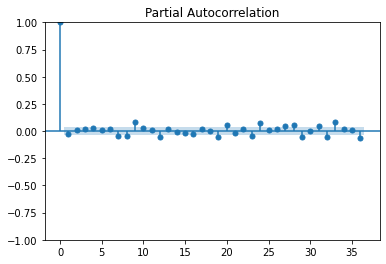

In [24]:
plt.figure(figsize=(20,10))
pacf = plot_pacf(df['Close First Difference'].dropna())

In [25]:
to_row=int(0.9*len(df))
training_s=df[:to_row]['Close First Difference']
testing_s=df[to_row:]['Close First Difference']

In [26]:
training_s.head()

Date
2014-09-17     0.000000
2014-09-18   -32.894012
2014-09-19   -29.644012
2014-09-20    14.108002
2014-09-21   -10.082977
Name: Close First Difference, dtype: float64

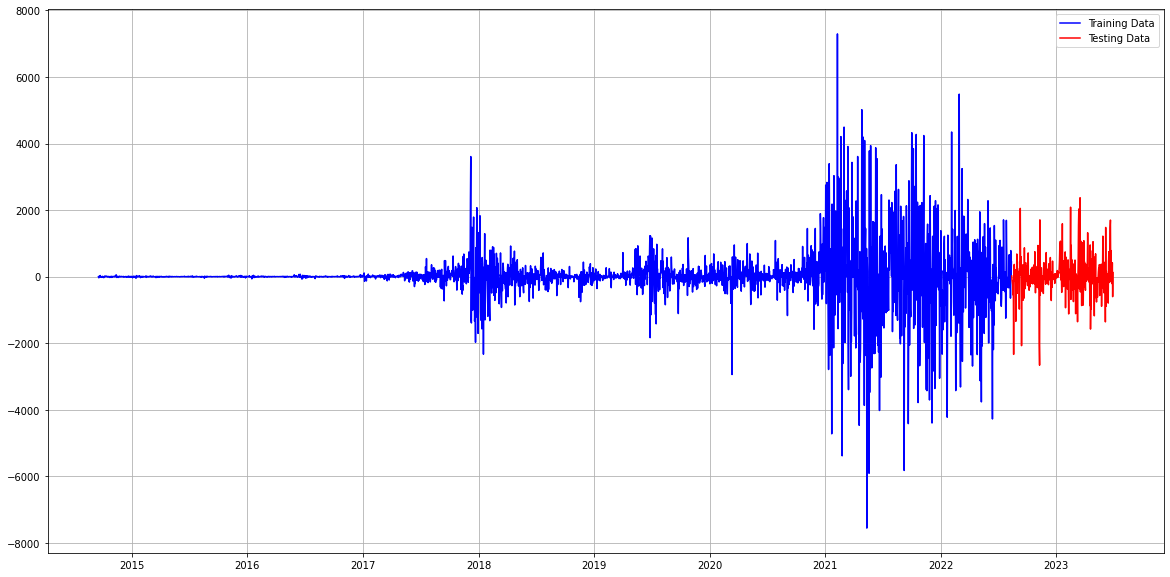

In [27]:
plt.figure(figsize=(20,10))
plt.grid('True')
plt.plot(training_s,'blue',label='Training Data')
plt.plot(testing_s,'red',label='Testing Data')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

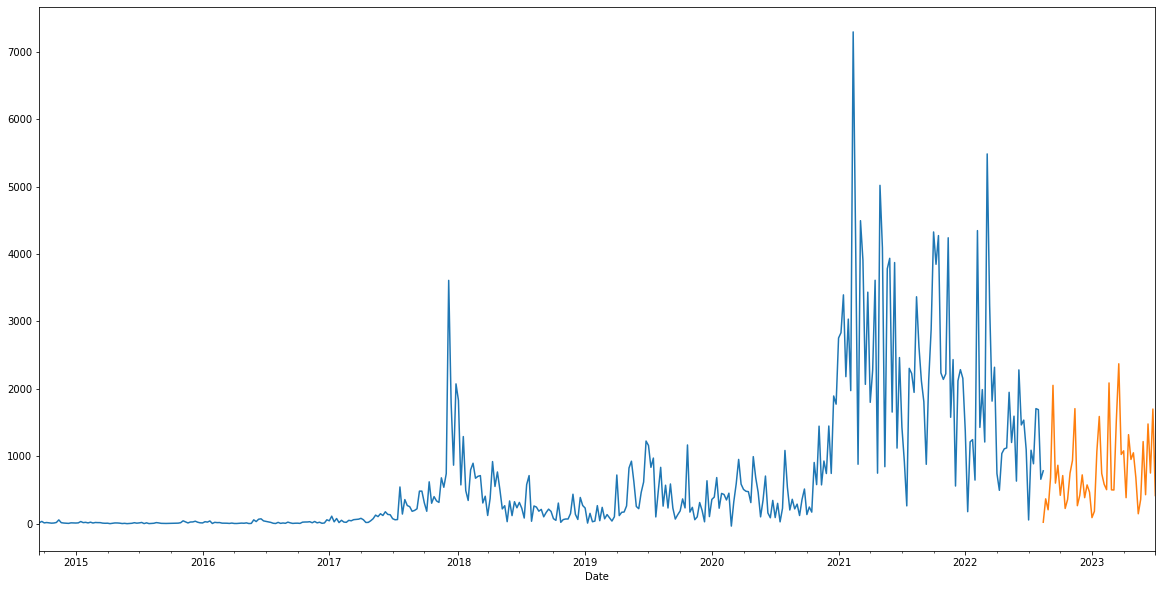

In [28]:
plt.figure(figsize=(20,10))
training_s.resample(rule='W').max().plot()
testing_s.resample(rule='W').max().plot()

In [29]:
n_test=len(testing)
print(n_test)

321


In [30]:
len(training)

2887

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
type(training)

list

In [32]:
model_predictions=[]
for i in range(n_test):
    model=ARIMA(training,order=(1,1,1))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output)
    model_predictions.append(yhat)
    actual_test_value=testing[i]
    training.append(actual_test_value)
   


In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3207
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25927.001
Date:                Thu, 29 Jun 2023   AIC                          51860.002
Time:                        12:00:22   BIC                          51878.221
Sample:                             0   HQIC                         51866.533
                               - 3207                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0851      0.358     -0.238      0.812      -0.786       0.616
ma.L1          0.0605      0.359      0.169      0.866      -0.643       0.764
sigma2        6.2e+05   5127.230    120.918      0.000     6.1e+05     6.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             37526.89
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             844.54   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
model_predictions

[[24391.31633073327],
 [24423.97119822992],
 [24322.037198532547],
 [24141.564935742786],
 [23889.64019865962],
 [23349.795126254707],
 [23215.354802923182],
 [20936.983948040244],
 [21155.977715905447],
 [21525.05508194817],
 [21402.742554745422],
 [21524.61244033259],
 [21398.583156536366],
 [21595.458328183948],
 [20294.994051491358],
 [20045.941009043225],
 [19627.55387517833],
 [20279.885862749426],
 [19810.72348258242],
 [20042.476235299695],
 [20125.477353637394],
 [19973.95686503344],
 [19835.475502589925],
 [19982.516483041167],
 [19817.12355893044],
 [18862.791921682012],
 [19277.269378264846],
 [19329.405869923845],
 [21327.437107035836],
 [21675.8342487063],
 [21767.237376473688],
 [22355.063663916415],
 [20352.412798215675],
 [20239.394245171152],
 [19715.556458895393],
 [19769.771935369066],
 [20118.412974632207],
 [19438.806041165582],
 [19539.61427086977],
 [18908.43497267995],
 [18555.33621534592],
 [19390.056100883266],
 [19302.175601423605],
 [18946.32454280279],
 [1

Text(0.5, 1.0, 'Overall Trends')

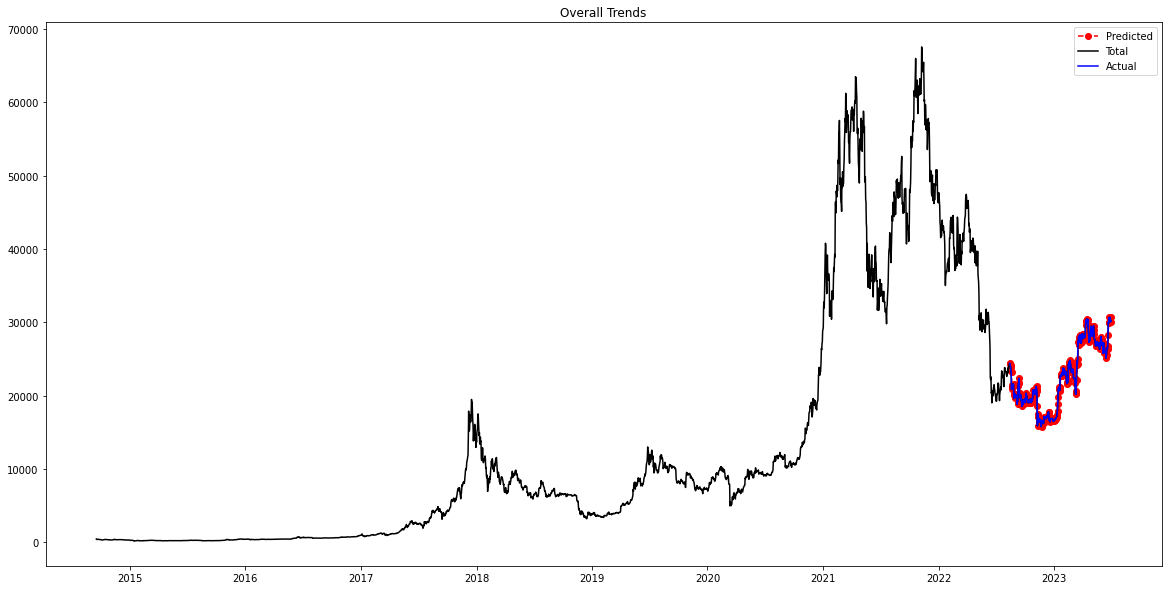

In [35]:
plt.figure(figsize=(20,10))
date_range=np.array(df.index)

date_range_pred=np.array(df[to_row:].index)
plt.plot(date_range_pred,model_predictions[:],color='red',linestyle='dashed',marker='o',label='Predicted')
plt.plot(date_range,np.array(df['Adj Close']),color='black',label='Total')
plt.plot(date_range_pred,testing,color='blue',label='Actual')
plt.legend()
plt.title('Overall Trends')

Text(0.5, 1.0, 'Predictions and actual')

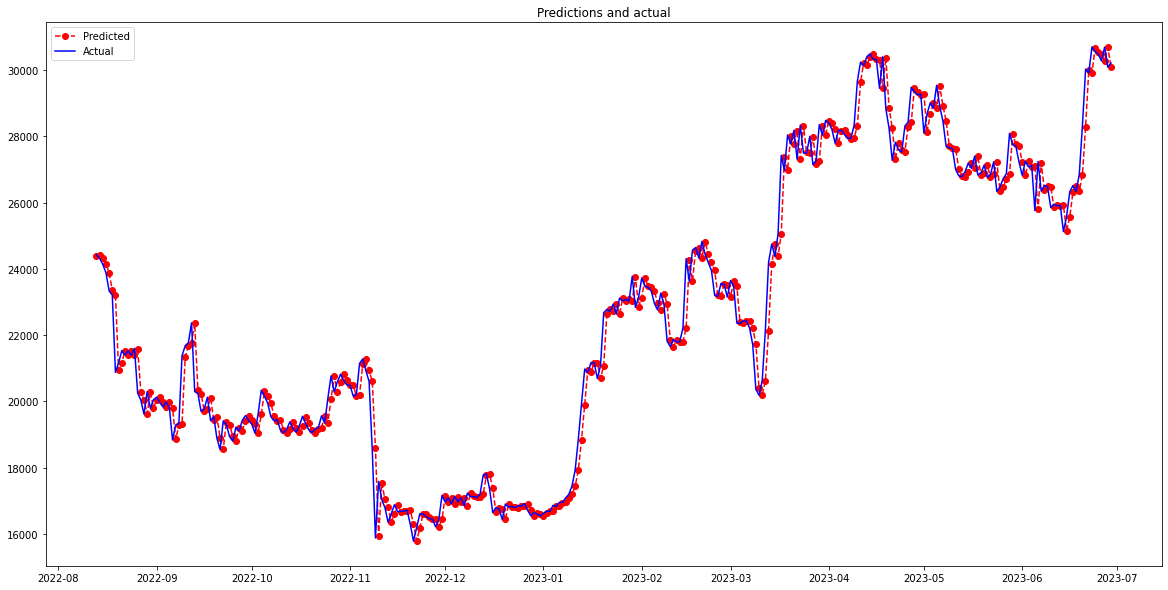

In [36]:
plt.figure(figsize=(20,10))
date_range=np.array(df.index)
plt.plot(date_range_pred,model_predictions[:],color='red',linestyle='dashed',marker='o',label='Predicted')
plt.plot(date_range_pred,testing,color='blue',label='Actual')
plt.legend()
plt.title('Predictions and actual')


In [37]:
mape=np.mean(np.abs(np.array(model_predictions)-np.array(testing))/np.abs(testing))

In [38]:
print('MAPE : ', str(mape))

MAPE :  0.22794903576406875


In [39]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(model_predictions,testing))
print(mean_absolute_error(model_predictions,testing))

0.9805283580330022
400.9781755427057
